In [1]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score, recall_score,f1_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Datasets

In [23]:
df1 = pd.read_csv('Fraud_Data.csv')
df2 = pd.read_csv('IpAddress_to_Country.csv')
df3 = pd.read_csv('creditcard.csv')

In [18]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [19]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [24]:
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA
# Data Overview and Summary

In [11]:
def summarize_data(df):
    # Basic Information
    def basic_info(df):
        print(df.info())
        print(df.describe(include='all'))
        print(df.isnull().sum())

    # Specific Summarizations
    def specific_summarizations(df):
        num_records = df.shape[0]
        num_unique_values = df.nunique()

        print(f'Number of records: {num_records}')
        print('Number of unique values per column:')
        print(num_unique_values)

        for column in df.columns:
            if df[column].dtype == 'object':
                print(f'\nTop 5 most frequent values in column "{column}":')
                print(df[column].value_counts().head())
            elif df[column].dtype in ['int64', 'float64']:
                total = df[column].sum()
                mean = df[column].mean()
                print(f'\nTotal of column "{column}": {total}')
                print(f'Mean of column "{column}": {mean:.2f}')

                if pd.to_datetime(df[column], errors='coerce').notnull().all():
                    df[column] = pd.to_datetime(df[column])
                    messages_per_period = df[column].dt.to_period('M').value_counts().sort_index()
                    print(f'\nNumber of records per month for column "{column}":')
                    print(messages_per_period)

        numeric_columns = df.select_dtypes(include=['number']).columns
        if not numeric_columns.empty:
            top_messages = df.nlargest(5, numeric_columns[0])
            print('\nTop 5 records by the first numerical column:')
            print(top_messages)
        else:
            print('\nNo numerical columns to display top records.')


    # Calling functions
    print("Basic Information:")
    basic_info(df)
    print("\nSpecific Summarizations:")
    specific_summarizations(df)

In [12]:
summarize_data(df1)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  datetime64[ns]
 1   signup_time     151112 non-null  object        
 2   purchase_time   151112 non-null  object        
 3   purchase_value  151112 non-null  datetime64[ns]
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  datetime64[ns]
 9   ip_address      151112 non-null  datetime64[ns]
 10  class           151112 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(6)
memory usage: 12.7+ MB
None
                              user_id          signup_time  \
count                          151112               15

# Handle Missing Values
Has no missing values so no imputation needed

# Data Cleaning

In [20]:
# Remove duplicates
df1.drop_duplicates(inplace=True)

In [22]:
# Correct data types
# Convert columns to respective data types
df1['signup_time'] = pd.to_datetime(df1['signup_time'])
df1['purchase_time'] = pd.to_datetime(df1['purchase_time'])
df1['user_id'] = df1['user_id'].astype(str)
df1['device_id'] = df1['device_id'].astype(str)
df1['source'] = df1['source'].astype(str)
df1['browser'] = df1['browser'].astype(str)
df1['sex'] = df1['sex'].astype(str)
df1['ip_address'] = df1['ip_address'].astype(str)
df1['purchase_value'] = df1['purchase_value'].astype(float)
df1['age'] = df1['age'].astype(int)
df1['class'] = df1['class'].astype(int)

print(df1.dtypes)
df1.head()

user_id                   object
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                object
class                      int64
dtype: object


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0


# Univariate analysis

In [26]:
def univariate_analysis(df):
    def analyze_column(column):
        print(f"Analysis for column: {column.name}")

        # Visualization
        plt.figure(figsize=(10, 6))

        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30)
            plt.title(f'Histogram of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line')
            plt.title(f'Time Series of {column.name}')
            plt.xlabel('Date')
            plt.ylabel('Frequency')
        else:
            # Limiting to top 20 categories to avoid clutter
            value_counts = column.value_counts()
            top_categories = value_counts[:20]
            top_categories.plot(kind='bar')
            plt.title(f'Bar Plot of {column.name}')
            plt.xlabel(column.name)
            plt.ylabel('Frequency')
            if len(value_counts) > 20:
                plt.title(f'Bar Plot of {column.name} (Top 20 categories)')
                plt.xlabel(f'{column.name} (Top 20)')
                plt.ylabel('Frequency')

        plt.show()
        print("\n\n")

    # Sampling the data if too large
    if len(df) > 10000:
        df_sample = df.sample(10000)
    else:
        df_sample = df

    for column in df_sample.columns:
        analyze_column(df_sample[column])

Analysis for column: user_id


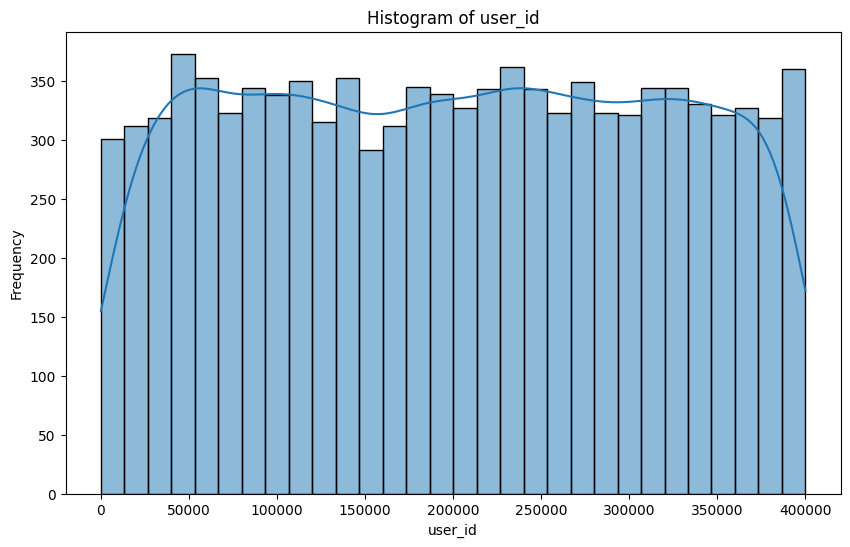




Analysis for column: signup_time


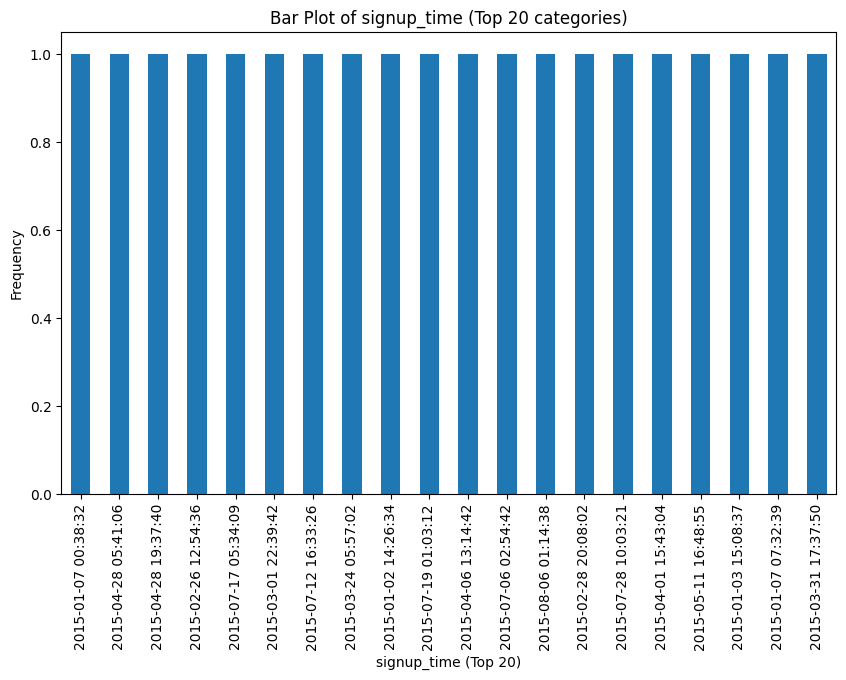




Analysis for column: purchase_time


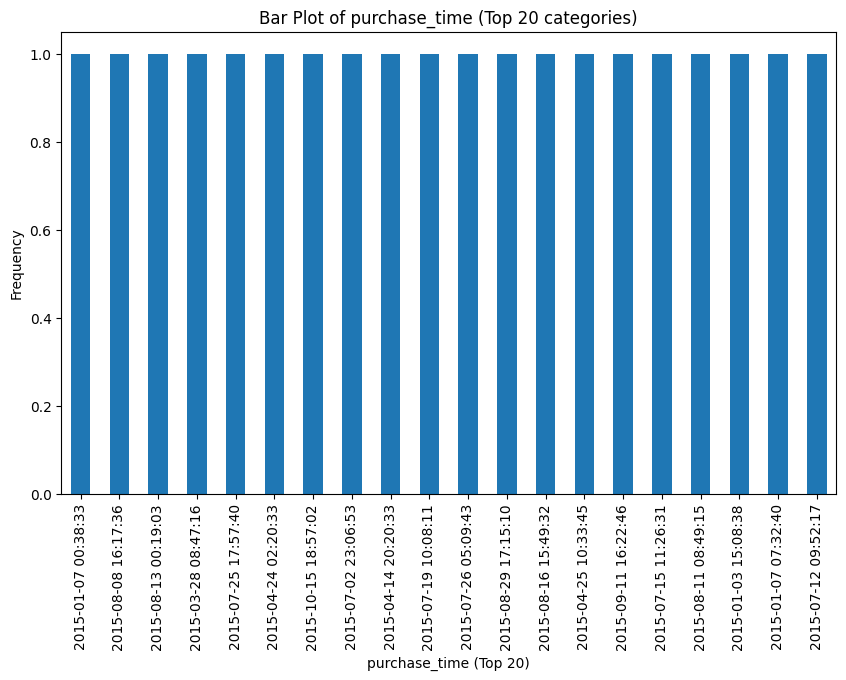




Analysis for column: purchase_value


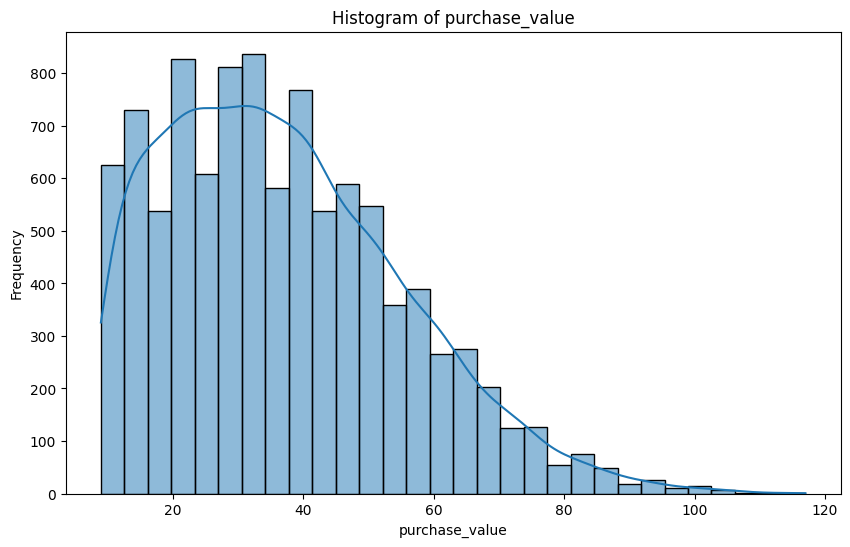




Analysis for column: device_id


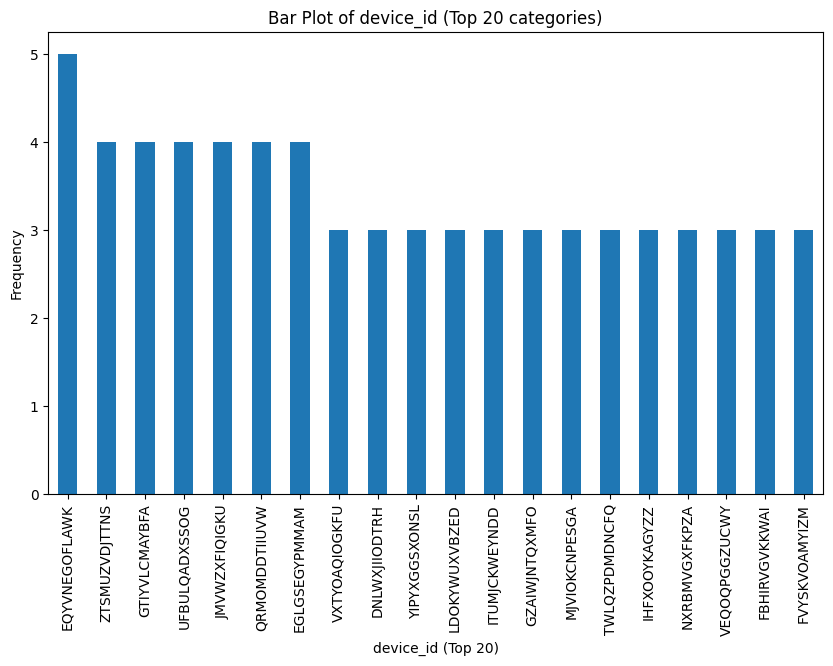




Analysis for column: source


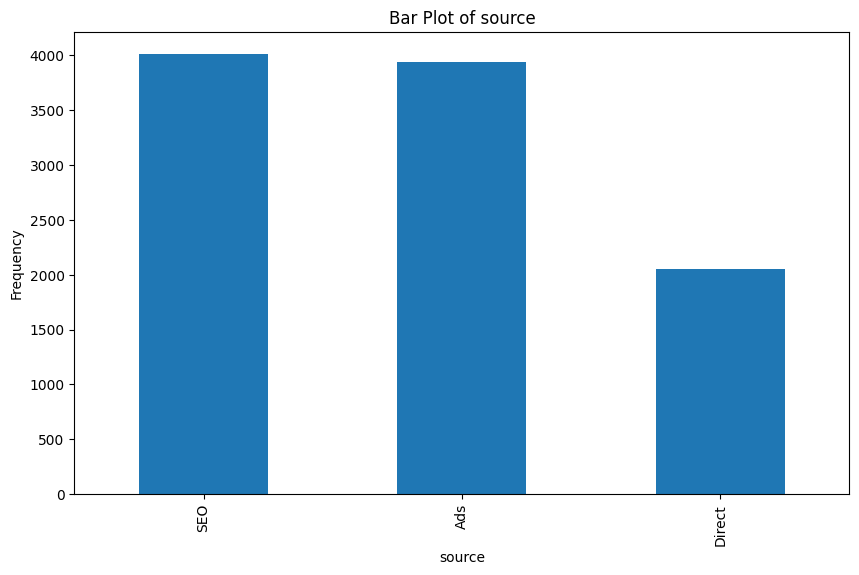




Analysis for column: browser


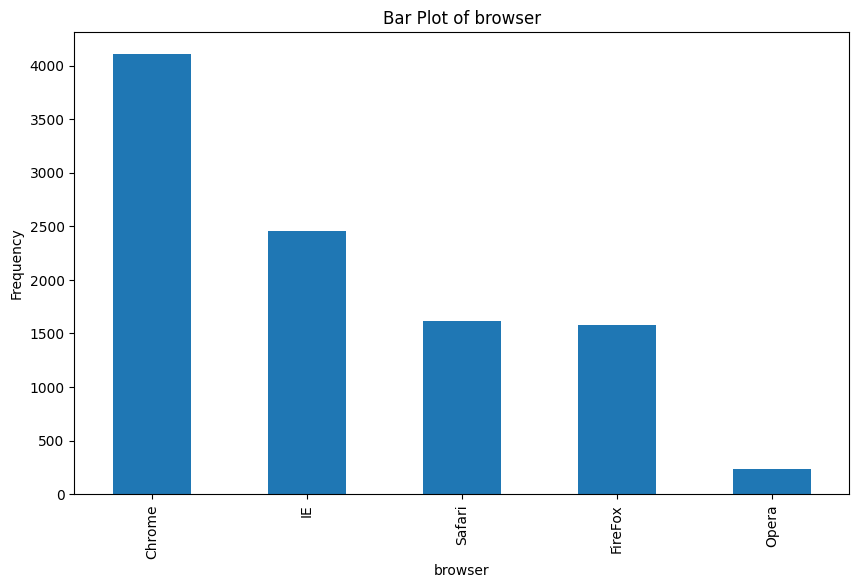




Analysis for column: sex


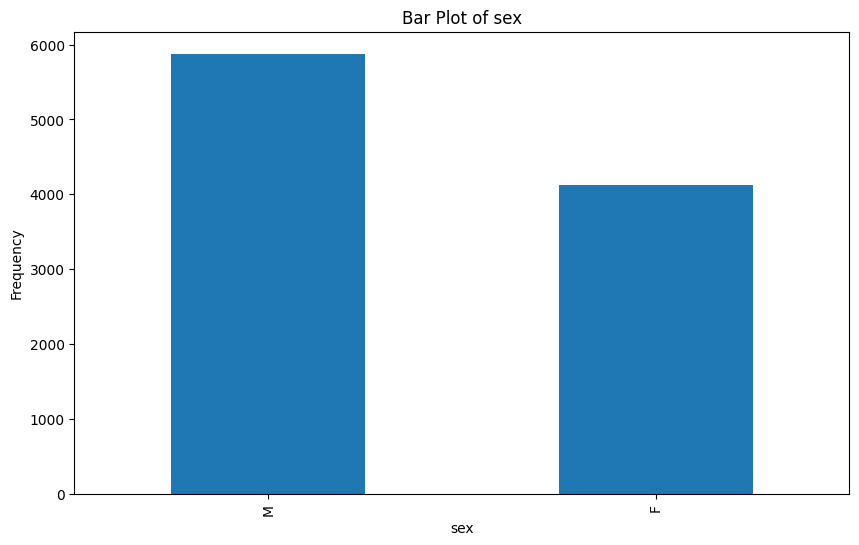




Analysis for column: age


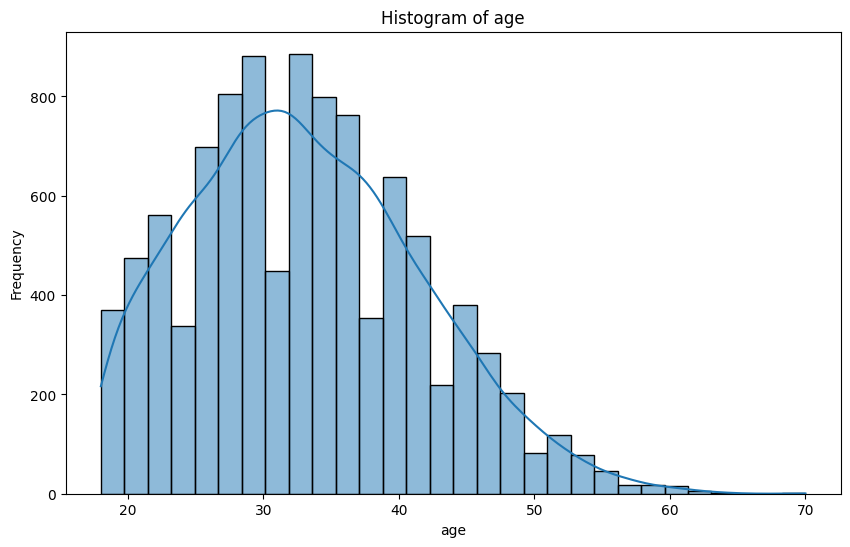




Analysis for column: ip_address


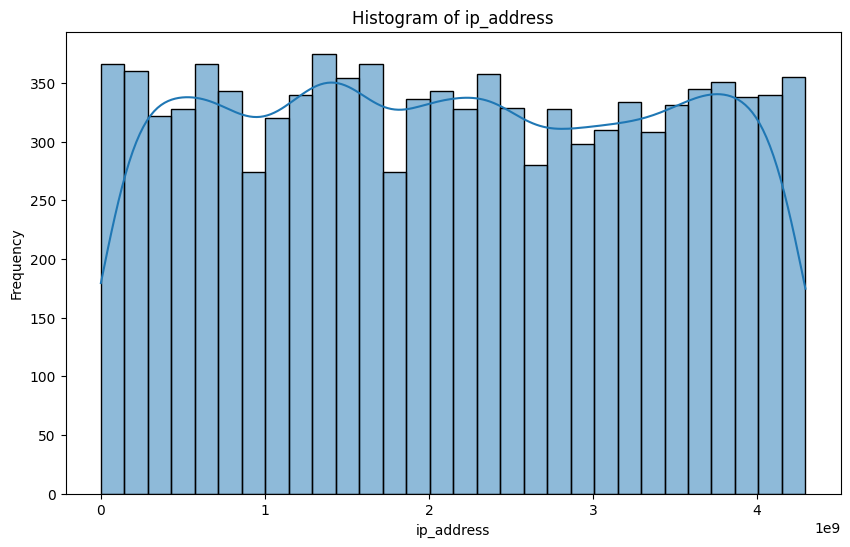




Analysis for column: class


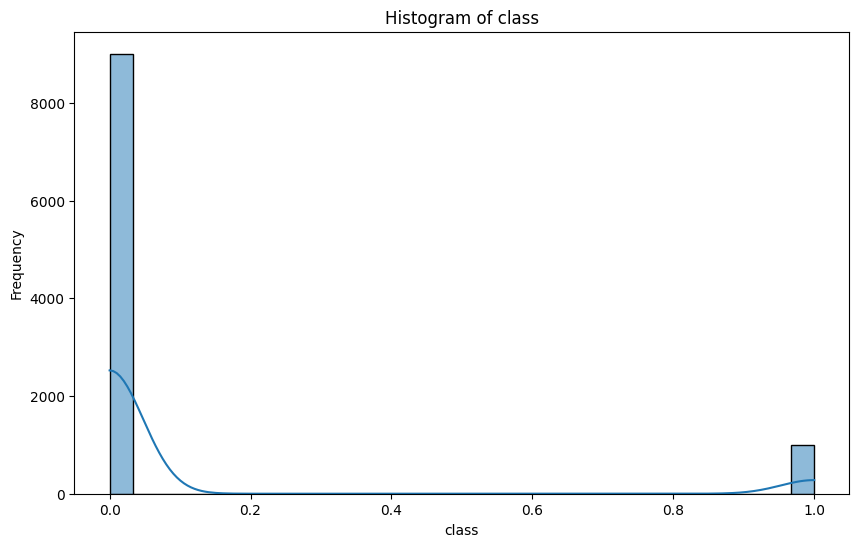

In [27]:
univariate_analysis(df1)

# Bivariate Analysis

In [28]:
#Analyze the relationship between each feature and the target variable - Churn

def plot_box_violin(df, column, target, plot_type='box'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'box':
        sns.boxplot(x=target, y=column, data=df)
        plt.title(f'Box Plot of {column} by {target}')
    elif plot_type == 'violin':
        sns.violinplot(x=target, y=column, data=df)
        plt.title(f'Violin Plot of {column} by {target}')
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

def plot_count_stacked_bar(df, column, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target, data=df, palette='viridis')
    plt.title(f'Count Plot of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

def plot_stacked_bar_chart(df, column, target):
    crosstab = pd.crosstab(df[column], df[target])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Stacked Bar Chart of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
# Define the target variable
target = 'class'
for column in df1.columns:
  unique_values = df1[column].unique()
  length = len(unique_values)
  if column == target:
    continue
  if length > 5:
    plot_box_violin(df1, column, target, plot_type='box')
    # plot_box_violin(df1, column, target, plot_type='violin')
  else:
    plot_count_stacked_bar(df1, column, target)
    # plot_stacked_bar_chart(df1, column, target)

In [8]:
summarize_data(df2)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
        lower_bound_ip_address  upper_bound_ip_address        country
count             1.388460e+05            1.388460e+05         138846
unique                     NaN                     NaN            235
top                        NaN                     NaN  United States
freq                       NaN                     NaN          46868
mean              2.724532e+09            2.724557e+09            NaN
std               8.975215e+08            8.974979e+08            NaN
min               1.677722e+07            1.

In [25]:
summarize_data(df3)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa